In [1]:
pip install matplotlib pandas


You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 10)

# 1 Charger de la donnée

Dans ce notebook, nous allons étudier un dataset représentant la fréquentation quotidienne de 7 pistes cyclables Montréalaises en 2012.

Charger le dataset bikes.csv en utilisant la méthode `read_csv` de pandas. 

Jetez un coup d'oeil à la documentation => https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [4]:
df = pd.read_csv("/Users/citizen99xyz/workspace/python-labb/WebScrapping/FlightLated/airports.csv", encoding="ISO-8859-1")

Afficher les 3 premières lignes.

In [5]:
df.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


Comme on peut le voir, le dataset n'est pas proprement chargé, toutes les colonnes sont reunies en une. Pour arranger ceci, nous allons utiiser quelques arguments de la méthode `read_csv`.

* changer le separateur de colonne a `;` avec l'option `sep`
* "Parser" la collone date avec l'option `parse_date`
* Changer les dates pour avoir le jour et non le mois en premier
* Definir la colonne 'Date' comme index du dataframe avec `index_col`

# 1.1 Sélection d'une colonne

On peut selectionner une colonne (ou plusieurs) d'un dataframe de la même manière que l'on slectionne une clé dans un dictionnaire :
`df['column_name']` or `df[['col1', 'col2', etc]]`

Selectionner la colonne 'Berri 1'

In [87]:
cleanedRecord = df[['Game','Europe','Japan','North America','Global']]
classifiedRecord = cleanedRecord[0:10]

# 1.2 "Plotter" une colonne

Utiliser la méthode `.plot()` pour produire une graphique del la frequentation de la piste tout au long de l'année.

On remarque sans surprise que peu de gens prennent le vélo en hiver.

In [85]:
classifiedRecord.plot('Game','Europe','Japan','North America','Global')

ValueError: Japan is not a valid plot kind

On peut aussi plotter toutes les colonnes du dataframe en utilisant le même mechanisme.

In [ ]:
df.plot()

# 2 Premières analyses

Dans cette partie nous allons utiliser un nouveau jeu de données plus volumineux, représentant les appels au service 311 de la ville de New York.

Charger le fichier '311-service-requests.csv' dans un dataframe pandas.

In [30]:
df = pd.read_csv("/Users/citizen99xyz/workspace/python-labb/WEB SCRAPPING/311-service-requests.csv", encoding="ISO-8859-1")

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 2.1 Description du df

Explore the dataframe set with methods like .info(), .head(), .describe()

In [23]:
df.describe()

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
count,1.083690e+05,9.599500e+04,95995.000000,0.0,95995.000000,95995.000000
mean,2.651762e+07,1.004637e+06,205669.244867,NaN,40.731140,-73.926402
std,4.581237e+04,2.197539e+04,31411.404795,NaN,0.086216,0.079256
min,2.643349e+07,9.134950e+05,121152.000000,NaN,40.498949,-74.254437
25%,2.647680e+07,9.921310e+05,182473.500000,NaN,40.667471,-73.971607
50%,2.651678e+07,1.003397e+06,203207.000000,NaN,40.724433,-73.930874
75%,2.655771e+07,1.016867e+06,233941.000000,NaN,40.808773,-73.882164
max,2.659613e+07,1.067024e+06,271485.000000,NaN,40.911792,-73.701278


# 2.2 Sélectionner des colonnes et des lignes

Selectionner la colonne 'Complaint Type'.

In [77]:
complaint = df['Complaint Type']

Afficher les 5 premieres ligne de la colonne 'Complaint Type'.

In [78]:
print(complaint)

0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
108364           Street Condition
108365           Street Condition
108366           Street Condition
108367           Street Condition
108368                        NaN
Name: Complaint Type, Length: 108369, dtype: object


# Nombre d'aeroport différents

Afficher tous les noms de colonnes en utilisant l'attribut columns.values

In [11]:
df.head()
airPortFrame = df[['name']]
#airPortFrame.count()

Créer un nouveaux dataset en selectionnant les colonnes 'Created Date', 'Closed Date', 'Complaint Type', 'Incident Address' et 'Street Name'

In [58]:
newDataSet = df[['Created Date', 'Closed Date', 'Complaint Type', 'Incident Address','Street Name']]
newDataSet['Complaint Type'].value_counts()


HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     6841
DOF Literature Request     5469
PLUMBING                   5373
                          ...  
Snow                          1
Ferry Permit                  1
Stalled Sites                 1
Highway Sign - Damaged        1
DWD                           1
Name: Complaint Type, Length: 165, dtype: int64

# 2.4 Quelles est la plainte qui revient le plus souvent?

Utiliser la méthode `.value_counts()` pour compter le nombre de plaintes pour chaque type de plainte.

<AxesSubplot:>

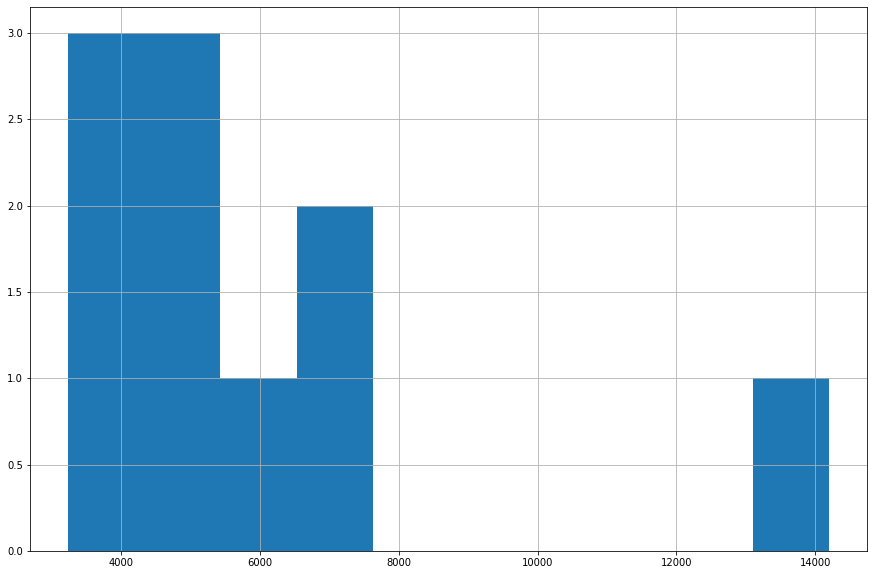

In [65]:
newDataSet['Complaint Type'].value_counts().head(10).hist()

utiliser la methode .sort() et afficher le top 10 des types de plainte avec le plus d'enregistremments.

Utiliser la méthose plot() pour produire un graphique en barre de ce top 10.

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  